In [1]:
import pandas as pd

# 데이터 로드
train_df = pd.read_csv('titanic/train.csv')
test_df = pd.read_csv('titanic/test.csv')

print("훈련 데이터셋 미리보기:")
print(train_df.head())
print("\n테스트 데이터셋 미리보기:")
print(test_df.head())

훈련 데이터셋 미리보기:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

In [2]:
print("\n훈련 데이터셋 정보:")
train_df.info()
print("\n테스트 데이터셋 정보:")
test_df.info()


훈련 데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

테스트 데이터셋 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-nu

In [3]:
print("\n훈련 데이터셋 기술 통계량:")
print(train_df.describe())
print("\n테스트 데이터셋 기술 통계량:")
print(test_df.describe())


훈련 데이터셋 기술 통계량:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

테스트 데이터셋 기술 통계량:
       PassengerId      Pclass         Age    

In [4]:
print("\n훈련 데이터셋 결측치:")
print(train_df.isnull().sum())
print("\n테스트 데이터셋 결측치:")
print(test_df.isnull().sum())


훈련 데이터셋 결측치:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

테스트 데이터셋 결측치:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


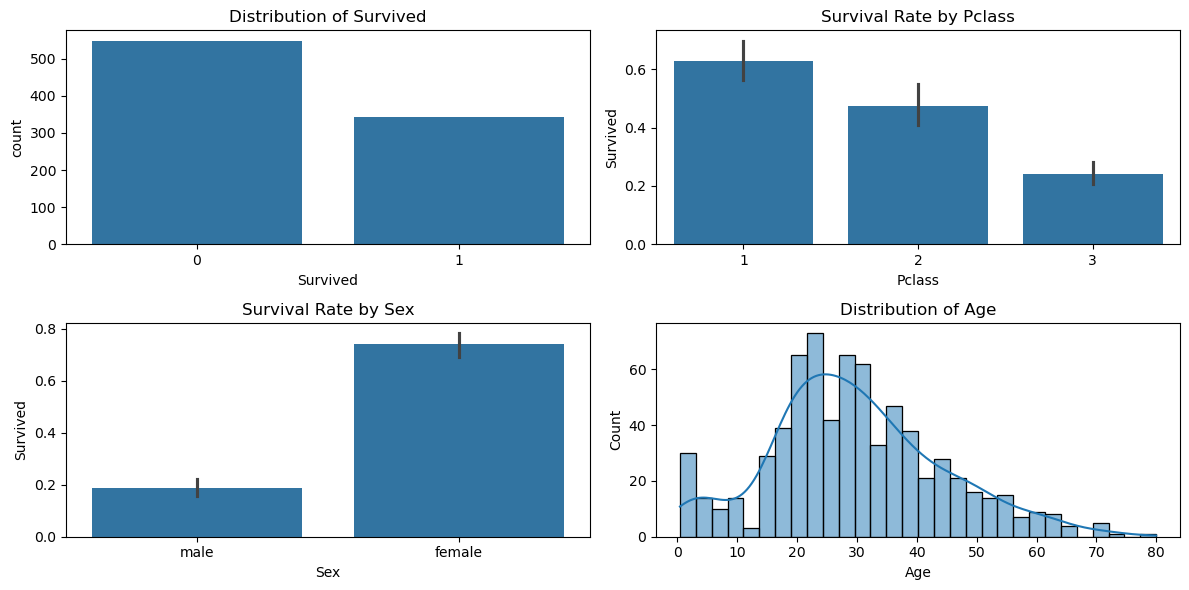

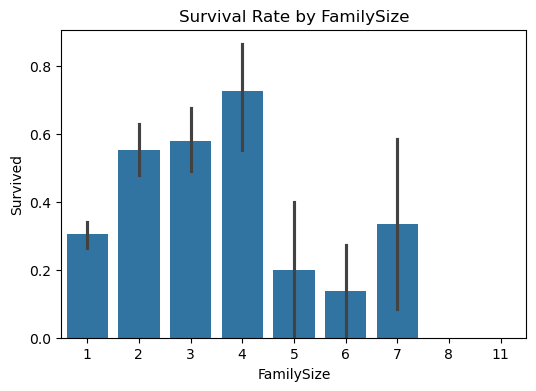

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# 'Survived' 컬럼 분포
plt.subplot(2, 2, 1)
sns.countplot(x='Survived', data=train_df)
plt.title('Distribution of Survived')

# 'Pclass'와 'Survived' 관계
plt.subplot(2, 2, 2)
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pclass')

# 'Sex'와 'Survived' 관계
plt.subplot(2, 2, 3)
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')

# 'Age' 분포
plt.subplot(2, 2, 4)
sns.histplot(train_df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')

plt.tight_layout()
plt.show()

# 'SibSp'와 'Parch' (가족 수) 특성 조합 및 시각화
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

plt.figure(figsize=(6, 4))
sns.barplot(x='FamilySize', y='Survived', data=train_df)
plt.title('Survival Rate by FamilySize')
plt.show()

In [6]:
# 'PassengerId', 'Name', 'Ticket', 'Cabin' 제거
train_df = train_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
# 테스트 데이터셋에서는 제출을 위해 PassengerId를 유지해야 하므로, 먼저 저장해 둡니다.
test_passenger_id = test_df['PassengerId']
test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [7]:
# 'Age' 결측치: 중앙값으로 대체
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)

# 'Fare' 결측치: 중앙값으로 대체 (테스트 데이터셋에만 결측치 존재)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# 'Embarked' 결측치: 최빈값으로 대체 (훈련 데이터셋에만 결측치 존재)
# 최빈값 찾기
most_frequent_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'].fillna(most_frequent_embarked, inplace=True)

/var/folders/5j/br4n39jd5g7dvk2f75v_zhf40000gn/T/ipykernel_80152/2780148208.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/var/folders/5j/br4n39jd5g7dvk2f75v_zhf40000gn/T/ipykernel_80152/2780148208.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [8]:
# 'Age' 결측치: 중앙값으로 대체
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

# 'Fare' 결측치: 중앙값으로 대체 (테스트 데이터셋에만 결측치 존재)
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# 'Embarked' 결측치: 최빈값으로 대체 (훈련 데이터셋에만 결측치 존재)
most_frequent_embarked = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].fillna(most_frequent_embarked)

In [9]:
# 'Sex' 컬럼 인코딩: male은 0, female은 1로 변환 (직접 매핑)
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# 'Embarked' 컬럼 원-핫 인코딩 (가변수 생성)
# drop_first=True: 다중 공선성(multicollinearity) 문제를 피하기 위해 첫 번째 카테고리를 삭제합니다.
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

In [10]:
# 'Age'를 구간화하여 새로운 특성 'AgeBand' 생성
train_df['AgeBand'] = pd.cut(train_df['Age'], 5, labels=[0, 1, 2, 3, 4])
test_df['AgeBand'] = pd.cut(test_df['Age'], 5, labels=[0, 1, 2, 3, 4])
# 원본 Age 컬럼은 더 이상 필요 없으므로 삭제
train_df = train_df.drop('Age', axis=1)
test_df = test_df.drop('Age', axis=1)

# 'Fare'를 구간화하여 새로운 특성 'FareBand' 생성
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4, labels=[0, 1, 2, 3])
test_df['FareBand'] = pd.qcut(test_df['Fare'], 4, labels=[0, 1, 2, 3])
# 원본 Fare 컬럼은 더 이상 필요 없으므로 삭제
train_df = train_df.drop('Fare', axis=1)
test_df = test_df.drop('Fare', axis=1)

In [11]:
# 훈련 데이터셋에서 'Survived' 컬럼을 타겟 변수로 분리
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']

# 테스트 데이터셋은 이미 타겟이 없음
X_test = test_df.copy() # 테스트 데이터프레임 복사

In [12]:
from sklearn.model_selection import train_test_split

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"훈련 데이터셋 크기: {X_train_split.shape}")
print(f"검증 데이터셋 크기: {X_val_split.shape}")

훈련 데이터셋 크기: (712, 9)
검증 데이터셋 크기: (179, 9)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 로지스틱 회귀 모델 초기화
# solver='liblinear': 작은 데이터셋에 잘 작동하고, L1/L2 정규화를 지원하는 최적화 알고리즘입니다.
model = LogisticRegression(solver='liblinear', random_state=42)

# 모델 학습
model.fit(X_train_split, y_train_split)

# 검증 데이터셋으로 예측
y_val_pred = model.predict(X_val_split)

# 모델 성능 평가
print("\n모델 학습 결과 (검증 데이터셋):")
print(f"정확도: {accuracy_score(y_val_pred, y_val_split):.4f}")
print("\n분류 보고서:")
print(classification_report(y_val_pred, y_val_split))
print("\n혼동 행렬:")
print(confusion_matrix(y_val_pred, y_val_split))


모델 학습 결과 (검증 데이터셋):
정확도: 0.7933

분류 보고서:
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       113
           1       0.71      0.74      0.73        66

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.80      0.79      0.79       179


혼동 행렬:
[[93 20]
 [17 49]]


In [14]:
# 테스트 데이터셋에 대한 예측 수행
predictions = model.predict(X_test)

# 제출 파일 생성
submission_df = pd.DataFrame({'PassengerId': test_passenger_id, 'Survived': predictions})
submission_df.to_csv('submission.csv', index=False)

print("\n제출 파일 'submission.csv'가 생성되었습니다.")
print(submission_df.head())

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- PassengerId


In [15]:
# 테스트 데이터셋 복사본에서 PassengerId를 제외하고 모델 입력으로 사용할 특성들만 남김
# test_df는 이미 'Name', 'Ticket', 'Cabin'이 제거된 상태이므로, 'PassengerId'만 추가로 제거합니다.
X_test = test_df.drop('PassengerId', axis=1)

In [16]:
# 테스트 데이터셋에 대한 예측 수행
predictions = model.predict(X_test)

# 제출 파일 생성
submission_df = pd.DataFrame({'PassengerId': test_passenger_id, 'Survived': predictions})
submission_df.to_csv('submission.csv', index=False)

print("\n제출 파일 'submission.csv'가 생성되었습니다.")
print(submission_df.head())


제출 파일 'submission.csv'가 생성되었습니다.
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         0


In [17]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# X_train과 y_train은 전처리 완료된 훈련 데이터 (Survived 컬럼 분리 후)
# X_train = train_df.drop('Survived', axis=1)
# y_train = train_df['Survived']

# K-Fold 설정 (예: 5-Fold)
# StratifiedKFold는 분류 문제에서 각 폴드에 클래스 비율을 유지해줍니다.
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
precisions = []
recal = []
f1_scores = []

print("K-Fold Cross-Validation 시작...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"\n--- Fold {fold+1} ---")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model = LogisticRegression(solver='liblinear', random_state=42)
    model.fit(X_train_fold, y_train_fold)
    y_pred_fold = model.predict(X_val_fold)

    # 각 폴드에 대한 성능 지표 계산
    fold_accuracy = accuracy_score(y_val_fold, y_pred_fold)
    fold_precision = precision_score(y_val_fold, y_pred_fold)
    fold_recall = recall_score(y_val_fold, y_pred_fold)
    fold_f1 = f1_score(y_val_fold, y_pred_fold)

    accuracies.append(fold_accuracy)
    precisions.append(fold_precision)
    recal.append(fold_recall)
    f1_scores.append(fold_f1)

    print(f"정확도: {fold_accuracy:.4f}")
    print(f"정밀도: {fold_precision:.4f}")
    print(f"재현율: {fold_recall:.4f}")
    print(f"F1-점수: {fold_f1:.4f}")

print("\n--- Cross-Validation 최종 결과 ---")
print(f"평균 정확도: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")
print(f"평균 정밀도: {np.mean(precisions):.4f} (+/- {np.std(precisions):.4f})")
print(f"평균 재현율: {np.mean(recal):.4f} (+/- {np.std(recal):.4f})")
print(f"평균 F1-점수: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")

K-Fold Cross-Validation 시작...

--- Fold 1 ---
정확도: 0.7765
정밀도: 0.7042
재현율: 0.7246
F1-점수: 0.7143

--- Fold 2 ---
정확도: 0.7865
정밀도: 0.7500
재현율: 0.6618
F1-점수: 0.7031

--- Fold 3 ---
정확도: 0.7809
정밀도: 0.7544
재현율: 0.6324
F1-점수: 0.6880

--- Fold 4 ---
정확도: 0.7865
정밀도: 0.7206
재현율: 0.7206
F1-점수: 0.7206

--- Fold 5 ---
정확도: 0.8090
정밀도: 0.7397
재현율: 0.7826
F1-점수: 0.7606

--- Cross-Validation 최종 결과 ---
평균 정확도: 0.7879 (+/- 0.0112)
평균 정밀도: 0.7338 (+/- 0.0188)
평균 재현율: 0.7044 (+/- 0.0525)
평균 F1-점수: 0.7173 (+/- 0.0243)


In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
# ... (K-Fold 설정 및 루프 내부) ...

# 모델 학습 후 y_pred_fold 대신 예측 확률 사용
y_pred_proba_fold = model.predict_proba(X_val_fold)[:, 1] # 1은 '생존' 클래스에 대한 확률

fold_auc = roc_auc_score(y_val_fold, y_pred_proba_fold)
aucs.append(fold_auc)

# ... (Fold별 결과 출력에 fold_auc 추가) ...

# 최종 결과에 평균 AUC와 표준편차 추가
print(f"평균 AUC: {np.mean(aucs):.4f} (+/- {np.std(aucs):.4f})")

NameError: name 'aucs' is not defined

In [19]:
from sklearn.metrics import roc_curve, roc_auc_score
# ... (K-Fold 설정 및 루프 내부) ...

# 모델 학습 후 y_pred_fold 대신 예측 확률 사용
y_pred_proba_fold = model.predict_proba(X_val_fold)[:, 1] # 1은 '생존' 클래스에 대한 확률

fold_auc = roc_auc_score(y_val_fold, y_pred_proba_fold)
aucs.append(fold_auc)

# ... (Fold별 결과 출력에 fold_auc 추가) ...

# 최종 결과에 평균 AUC와 표준편차 추가
print(f"평균 AUC: {np.mean(aucs):.4f} (+/- {np.std(aucs):.4f})")

NameError: name 'aucs' is not defined

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
# ... (K-Fold 설정 및 루프 내부) ...
aucs = []
# 모델 학습 후 y_pred_fold 대신 예측 확률 사용
y_pred_proba_fold = model.predict_proba(X_val_fold)[:, 1] # 1은 '생존' 클래스에 대한 확률

fold_auc = roc_auc_score(y_val_fold, y_pred_proba_fold)
aucs.append(fold_auc)

# ... (Fold별 결과 출력에 fold_auc 추가) ...

# 최종 결과에 평균 AUC와 표준편차 추가
print(f"평균 AUC: {np.mean(aucs):.4f} (+/- {np.std(aucs):.4f})")

평균 AUC: 0.8716 (+/- 0.0000)


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'accuracies', 'precisions', 'recal', 'f1_scores', 'aucs' lists are populated from K-Fold CV
# (Previous K-Fold Cross-Validation code block should be run first to get these lists)

results_df = pd.DataFrame({
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recal,
    'F1-Score': f1_scores,
    'AUC': aucs
})

plt.figure(figsize=(14, 7))

# 박스 플롯 (Box Plot)
plt.subplot(1, 2, 1) # 1행 2열 중 첫 번째 플롯
sns.boxplot(data=results_df)
plt.title('Distribution of Performance Metrics Across Folds (Box Plot)')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 바이올린 플롯 (Violin Plot) - 분포 밀도까지 보여줌
plt.subplot(1, 2, 2) # 1행 2열 중 두 번째 플롯
sns.violinplot(data=results_df)
plt.title('Distribution of Performance Metrics Across Folds (Violin Plot)')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\n--- 각 지표별 통계 요약 ---")
print(results_df.describe())

ValueError: All arrays must be of the same length

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- (이전 데이터 전처리 코드 실행 후 X_train, y_train이 준비되어 있어야 합니다) ---
# 예시:
# X_train = train_df.drop('Survived', axis=1)
# y_train = train_df['Survived']
# X_test = test_df.drop('PassengerId', axis=1) # test_df에서 PassengerId도 제거되었는지 확인


# K-Fold 설정 (예: 5-Fold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- 모든 성능 지표 리스트 초기화 ---
accuracies = []
precisions = []
recal = []
f1_scores = []
aucs = []

print("K-Fold Cross-Validation 시작...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"\n--- Fold {fold+1} ---")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model = LogisticRegression(solver='liblinear', random_state=42)
    model.fit(X_train_fold, y_train_fold)

    # 예측값 및 예측 확률 계산
    y_pred_fold = model.predict(X_val_fold)
    y_pred_proba_fold = model.predict_proba(X_val_fold)[:, 1] # 1은 '생존' 클래스에 대한 확률

    # 성능 지표 계산 및 리스트에 추가
    fold_accuracy = accuracy_score(y_val_fold, y_pred_fold)
    fold_precision = precision_score(y_val_fold, y_pred_fold)
    fold_recall = recall_score(y_val_fold, y_pred_fold)
    fold_f1 = f1_score(y_val_fold, y_pred_fold)
    fold_auc = roc_auc_score(y_val_fold, y_pred_proba_fold)

    accuracies.append(fold_accuracy)
    precisions.append(fold_precision)
    recal.append(fold_recall)
    f1_scores.append(fold_f1)
    aucs.append(fold_auc)

    print(f"정확도: {fold_accuracy:.4f}")
    print(f"정밀도: {fold_precision:.4f}")
    print(f"재현율: {fold_recall:.4f}")
    print(f"F1-점수: {fold_f1:.4f}")
    print(f"AUC: {fold_auc:.4f}")

print("\n--- Cross-Validation 최종 결과 ---")
print(f"평균 정확도: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")
print(f"평균 정밀도: {np.mean(precisions):.4f} (+/- {np.std(precisions):.4f})")
print(f"평균 재현율: {np.mean(recal):.4f} (+/- {np.std(recal):.4f})")
print(f"평균 F1-점수: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")
print(f"평균 AUC: {np.mean(aucs):.4f} (+/- {np.std(aucs):.4f})")

---

### 검증값의 신뢰도 및 오류율 시각화

**1. 개별 폴드의 성능 지표 분포 시각화 (Box Plot 또는 Violin Plot)**

**기술적 원리:** 교차 검증의 각 폴드에서 얻은 성능 지표들의 분포를 시각화하면 모델 성능의 **중앙값, 퍼짐(분포 범위), 이상치 여부**를 한눈에 파악할 수 있습니다. 이는 모델의 **안정성**과 **일반화 성능의 변동성**을 보여주므로, 신뢰도를 평가하는 데 매우 유용합니다.

```python
# K-Fold 결과 리스트들을 DataFrame으로 통합
results_df = pd.DataFrame({
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recal,
    'F1-Score': f1_scores,
    'AUC': aucs
})

plt.figure(figsize=(14, 7))

# 박스 플롯 (Box Plot)
plt.subplot(1, 2, 1) # 1행 2열 중 첫 번째 플롯
sns.boxplot(data=results_df)
plt.title('Distribution of Performance Metrics Across Folds (Box Plot)')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 바이올린 플롯 (Violin Plot) - 분포 밀도까지 보여줌
plt.subplot(1, 2, 2) # 1행 2열 중 두 번째 플롯
sns.violinplot(data=results_df)
plt.title('Distribution of Performance Metrics Across Folds (Violin Plot)')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\n--- 각 지표별 통계 요약 ---")
print(results_df.describe())

SyntaxError: invalid syntax (2513152613.py, line 65)

K-Fold Cross-Validation 시작...

--- Fold 1 ---
정확도: 0.7765
정밀도: 0.7042
재현율: 0.7246
F1-점수: 0.7143
AUC: 0.8771

--- Fold 2 ---
정확도: 0.7865
정밀도: 0.7500
재현율: 0.6618
F1-점수: 0.7031
AUC: 0.8509

--- Fold 3 ---
정확도: 0.7809
정밀도: 0.7544
재현율: 0.6324
F1-점수: 0.6880
AUC: 0.8411

--- Fold 4 ---
정확도: 0.7865
정밀도: 0.7206
재현율: 0.7206
F1-점수: 0.7206
AUC: 0.8421

--- Fold 5 ---
정확도: 0.8090
정밀도: 0.7397
재현율: 0.7826
F1-점수: 0.7606
AUC: 0.8716

--- Cross-Validation 최종 결과 ---
평균 정확도: 0.7879 (+/- 0.0112)
평균 정밀도: 0.7338 (+/- 0.0188)
평균 재현율: 0.7044 (+/- 0.0525)
평균 F1-점수: 0.7173 (+/- 0.0243)
평균 AUC: 0.8566 (+/- 0.0150)


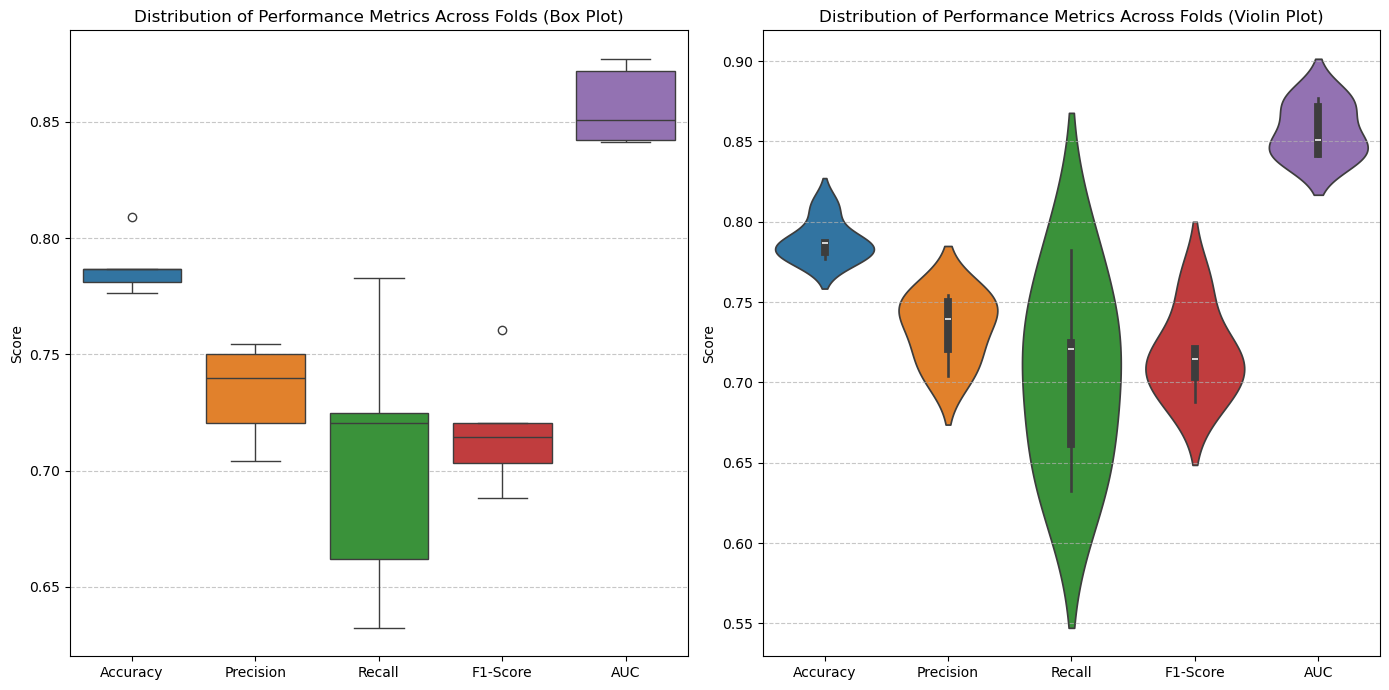


--- 각 지표별 통계 요약 ---
       Accuracy  Precision    Recall  F1-Score       AUC
count  5.000000   5.000000  5.000000  5.000000  5.000000
mean   0.787892   0.733785  0.704390  0.717312  0.856572
std    0.012517   0.021039  0.058730  0.027162  0.016785
min    0.776536   0.704225  0.632353  0.688000  0.841110
25%    0.780899   0.720588  0.661765  0.703125  0.842112
50%    0.786517   0.739726  0.720588  0.714286  0.850936
75%    0.786517   0.750000  0.724638  0.720588  0.871626
max    0.808989   0.754386  0.782609  0.760563  0.877075


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# --- (이전 데이터 전처리 코드 실행 후 X_train, y_train이 준비되어 있어야 합니다) ---
# 예시:
# X_train = train_df.drop('Survived', axis=1)
# y_train = train_df['Survived']
# X_test = test_df.drop('PassengerId', axis=1) # test_df에서 PassengerId도 제거되었는지 확인


# K-Fold 설정 (예: 5-Fold)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- 모든 성능 지표 리스트 초기화 ---
accuracies = []
precisions = []
recal = []
f1_scores = []
aucs = []

print("K-Fold Cross-Validation 시작...")
for fold, (train_index, val_index) in enumerate(kf.split(X_train, y_train)):
    print(f"\n--- Fold {fold+1} ---")
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model = LogisticRegression(solver='liblinear', random_state=42)
    model.fit(X_train_fold, y_train_fold)

    # 예측값 및 예측 확률 계산
    y_pred_fold = model.predict(X_val_fold)
    y_pred_proba_fold = model.predict_proba(X_val_fold)[:, 1] # 1은 '생존' 클래스에 대한 확률

    # 성능 지표 계산 및 리스트에 추가
    fold_accuracy = accuracy_score(y_val_fold, y_pred_fold)
    fold_precision = precision_score(y_val_fold, y_pred_fold)
    fold_recall = recall_score(y_val_fold, y_pred_fold)
    fold_f1 = f1_score(y_val_fold, y_pred_fold)
    fold_auc = roc_auc_score(y_val_fold, y_pred_proba_fold)

    accuracies.append(fold_accuracy)
    precisions.append(fold_precision)
    recal.append(fold_recall)
    f1_scores.append(fold_f1)
    aucs.append(fold_auc)

    print(f"정확도: {fold_accuracy:.4f}")
    print(f"정밀도: {fold_precision:.4f}")
    print(f"재현율: {fold_recall:.4f}")
    print(f"F1-점수: {fold_f1:.4f}")
    print(f"AUC: {fold_auc:.4f}")

print("\n--- Cross-Validation 최종 결과 ---")
print(f"평균 정확도: {np.mean(accuracies):.4f} (+/- {np.std(accuracies):.4f})")
print(f"평균 정밀도: {np.mean(precisions):.4f} (+/- {np.std(precisions):.4f})")
print(f"평균 재현율: {np.mean(recal):.4f} (+/- {np.std(recal):.4f})")
print(f"평균 F1-점수: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})")
print(f"평균 AUC: {np.mean(aucs):.4f} (+/- {np.std(aucs):.4f})")

### 검증값의 신뢰도 및 오류율 시각화

# **1. 개별 폴드의 성능 지표 분포 시각화 (Box Plot 또는 Violin Plot)**

# **기술적 원리:** 교차 검증의 각 폴드에서 얻은 성능 지표들의 분포를 시각화하면 모델 성능의 **중앙값, 퍼짐(분포 범위), 이상치 여부**를 한눈에 파악할 수 있습니다. 이는 모델의 **안정성**과 **일반화 성능의 변동성**을 보여주므로, 신뢰도를 평가하는 데 매우 유용합니다.

# ```python
# # K-Fold 결과 리스트들을 DataFrame으로 통합
results_df = pd.DataFrame({
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recal,
    'F1-Score': f1_scores,
    'AUC': aucs
})

plt.figure(figsize=(14, 7))

# 박스 플롯 (Box Plot)
plt.subplot(1, 2, 1) # 1행 2열 중 첫 번째 플롯
sns.boxplot(data=results_df)
plt.title('Distribution of Performance Metrics Across Folds (Box Plot)')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 바이올린 플롯 (Violin Plot) - 분포 밀도까지 보여줌
plt.subplot(1, 2, 2) # 1행 2열 중 두 번째 플롯
sns.violinplot(data=results_df)
plt.title('Distribution of Performance Metrics Across Folds (Violin Plot)')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print("\n--- 각 지표별 통계 요약 ---")
print(results_df.describe())

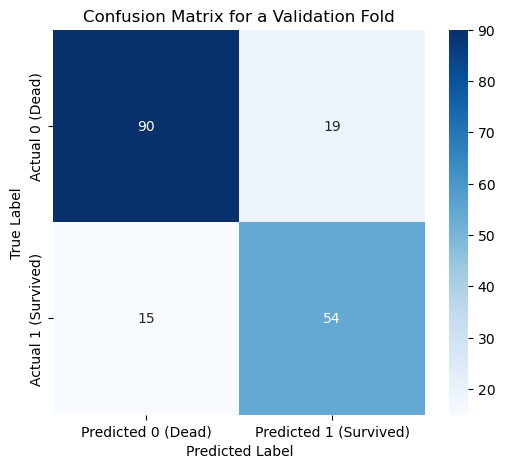

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 이 혼동 행렬은 K-Fold 교차 검증의 '마지막' 폴드 또는
# 별도로 분리한 단일 검증 세트 (X_val_split, y_val_split)의 결과입니다.
# 전체 교차 검증의 평균 혼동 행렬을 시각화하려면 각 폴드의 CM을 누적하여 평균 내야 합니다.
# 여기서는 편의를 위해 마지막 폴드의 결과를 사용합니다.
# y_val_split, y_pred_fold (마지막 폴드의 예측 결과)를 사용합니다.

cm = confusion_matrix(y_val_fold, y_pred_fold) # y_val_fold, y_pred_fold는 K-Fold 루프 마지막 반복의 값

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0 (Dead)', 'Predicted 1 (Survived)'],
            yticklabels=['Actual 0 (Dead)', 'Actual 1 (Survived)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for a Validation Fold')
plt.show()

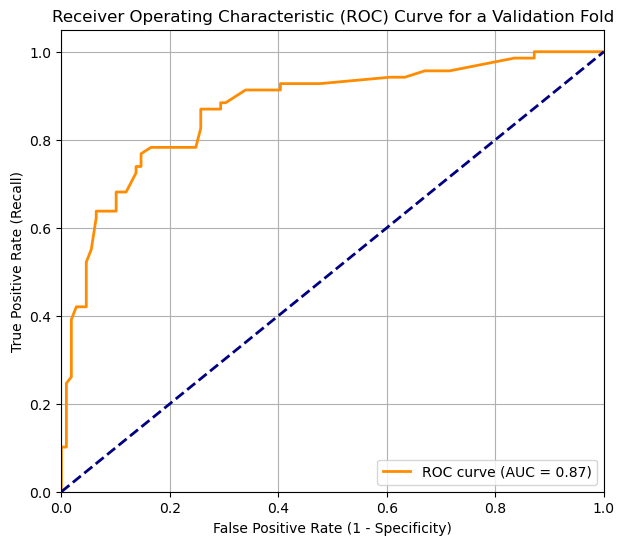

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# y_val_fold, y_pred_proba_fold는 K-Fold 루프 마지막 반복의 값입니다.

fpr, tpr, thresholds = roc_curve(y_val_fold, y_pred_proba_fold)
roc_auc = roc_auc_score(y_val_fold, y_pred_proba_fold)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve for a Validation Fold')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

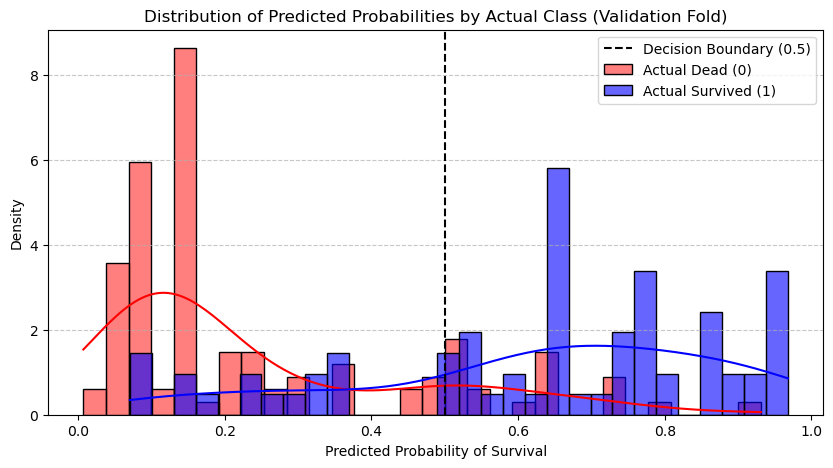

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# y_val_fold, y_pred_proba_fold는 K-Fold 루프 마지막 반복의 값입니다.

plt.figure(figsize=(10, 5))
sns.histplot(y_pred_proba_fold[y_val_fold == 0], color='red', bins=30, kde=True, stat='density', label='Actual Dead (0)')
sns.histplot(y_pred_proba_fold[y_val_fold == 1], color='blue', bins=30, kde=True, stat='density', label='Actual Survived (1)', alpha=0.6)
plt.axvline(x=0.5, color='black', linestyle='--', label='Decision Boundary (0.5)')
plt.title('Distribution of Predicted Probabilities by Actual Class (Validation Fold)')
plt.xlabel('Predicted Probability of Survival')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()